In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import seaborn as sns
import sys
sys.path.pop(2)
import cv2
from sklearn import svm
import glob2 as glob
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
cd /home/sritee/Desktop/beach/Important\ data

/home/sritee/Desktop/beach/Important data


In [3]:
Xpos=np.load('cups.npy')
Xneg=np.load('sand.npy')
X=np.vstack([Xpos,Xneg])
y=np.zeros(Xpos.shape[0]+Xneg.shape[0])
y[0:Xpos.shape[0]+1]=1
sns.set_style("whitegrid", {'axes.grid' : False})

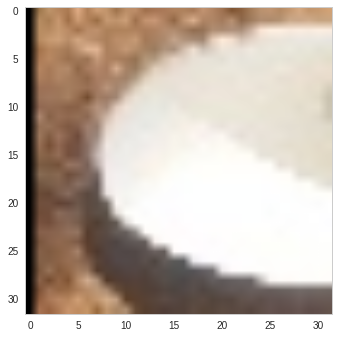

In [4]:
plt.imshow(Xpos[100].reshape(32,32,3))
plt.show()

In [5]:
# import the necessary packages
import numpy as np

# Malisiewicz et al.
def non_max_suppression_fast(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []

	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")

	# initialize the list of picked indexes	
	pick = []

	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]

	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)

	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)

		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])

		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)

		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]

		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))

	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
epochs = 20
y=y.reshape(-1,1)
#y=to_categorical(y)

Xre=(X/255).astype('float32').reshape(-1,32*32*3)
#xv=np.array(r)/255
#print('x_train shape:', x.shape)
print(Xre.shape)
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=32*32*3))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(Xre,y,validation_split=0.2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          )
#score = model.evaluate(x_test, y_test, verbose=0)

(3310, 3072)
Train on 2648 samples, validate on 662 samples
Epoch 1/20
2648/2648 [==============================] - 0s - loss: 0.2528 - acc: 0.8818 - val_loss: 0.1203 - val_acc: 0.8973
Epoch 2/20
2648/2648 [==============================] - 0s - loss: 0.1582 - acc: 0.9230 - val_loss: 0.0661 - val_acc: 1.0000
Epoch 3/20
2648/2648 [==============================] - 0s - loss: 0.1479 - acc: 0.9347 - val_loss: 0.0511 - val_acc: 1.0000
Epoch 4/20
2648/2648 [==============================] - 0s - loss: 0.1253 - acc: 0.9434 - val_loss: 0.0916 - val_acc: 0.9713
Epoch 5/20
2648/2648 [==============================] - 0s - loss: 0.1260 - acc: 0.9520 - val_loss: 0.1394 - val_acc: 0.9139
Epoch 6/20
2648/2648 [==============================] - 0s - loss: 0.1054 - acc: 0.9573 - val_loss: 0.0577 - val_acc: 0.9985
Epoch 7/20
2648/2648 [==============================] - 0s - loss: 0.1023 - acc: 0.9634 - val_loss: 0.0536 - val_acc: 0.9970
Epoch 8/20
2648/2648 [==============================] - 0s - loss

In [163]:
from keras.models import model_from_json
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cnn.h5")
print("Saved model to disk")


Saved model to disk


In [98]:
pwd

'/home/sritee/Desktop/beach/Important data/test_folder'

In [99]:
#load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("fnn.h5")
print("Loaded model from disk")

IndentationError: unexpected indent (<ipython-input-99-aadacc3f82fe>, line 6)

In [79]:
b=[]
for file in glob.glob('*.jpg'):
    #b.append(cv2.cvtColor(plt.imread(file),cv2.COLOR_BGR2GRAY))
    b.append(plt.imread(file))
import time
b=b[0:50]
len(b)

50

In [78]:
cd ../mv5/

/home/sritee/Desktop/beach/Important data/mv5


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                98336     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 99,153
Trainable params: 99,153
Non-trainable params: 0
_________________________________________________________________


In [34]:
import time
a=time.time()
#model.predict(Xpos[5].flatten().reshape(1,-1)/255)
model.predict(Xpos[5].reshape(1,32,32,3)/255)
print(time.time()-a)

0.03168511390686035


In [30]:
model.layers[0].get_weights()[0].shape

(3072, 32)

In [ ]:
0.00142

In [36]:
0.03/0.00142

21.12676056338028

In [32]:
cd ../test_folder/

/home/sritee/Desktop/beach/Important data/test_folder


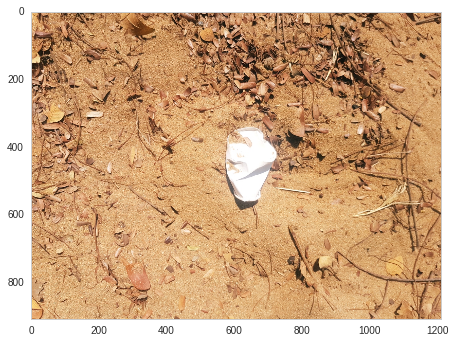

In [16]:
plt.imshow(b[0])
plt.show()

In [9]:
from skimage.util.shape import view_as_windows

In [42]:
b=[]
b.append(plt.imread('./mv5/32.jpg'))

In [114]:
a=cv2.resize(b[0],(140,140))

0.10361838340759277


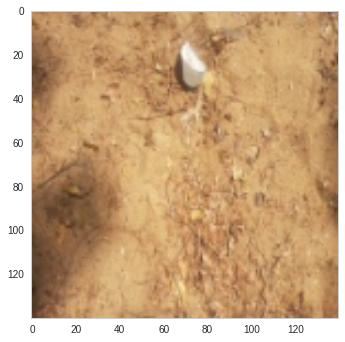

In [108]:
w=25
s=10
l=[]
img_rows=25
img_cols=25
c=0
cnt=0
for idx,file in enumerate(b):
    if cnt==1:
       break
    aaa=time.time()
    cnt=cnt+1
    t=cv2.resize(file,(140,140))
    im=t.copy()
    #print(idx)
    box=[]
    pat=[]
    
    for k in range(int((t.shape[0]-w)/(s))+1):
        for m in range(int(((t.shape[1]-w)/s))+1):
            c=c+1
            #print(k,m)
            image=t[k*s:k*s+w,m*s:m*s+w,:]
            im_r=cv2.resize(image,(img_rows,img_cols))/255
            #pred=clf.predict(im_r.reshape(1,-1))   #SVM
            #try:
            pred=model.predict_classes(im_r.reshape(1,img_rows,img_cols,3),verbose=0) #convolutional neural net
            #except:
            #pred=model.predict_classes(im_r.reshape(1,-1),verbose=0) #fully connected 

                #print(pred)
                #plt.imshow(pred.reshape(32,32,3))
            if pred==1:
                #print('hello!')
                #l.append([k,m])

                #cv2.rectangle(im,(m*s,k*s),(m*s+w,k*s+w),(0,255,3))
                box.append([m*s,k*s,m*s+w,k*s+w])
                #plt.imshow(im_r)
                #plt.show()
                #print('detect')
                #print(str(idx)+'hi')
                #plt.imshow(image)
                #print(1)
                #plt.imshow(image)
                #plt.show()
            #else:
                #cv2.rectangle(im,(k*s,m*s),(k*s+w,m*s+w),(0,255,3))
            #if c==50:
                #break


    #im=t.copy()

    box=np.array(box)
    p=np.array(non_max_suppression_fast(box,0.001))

    for k in range(p.shape[0]):
        cv2.rectangle(im,(p[k][0],p[k][1]),(p[k][2],p[k][3]),(255,0,3))
   
    baa=time.time()
    print(baa-aaa)

    l.append(im)

for k in l:
    plt.imshow(k)
    plt.show()

In [143]:
a=cv2.resize(b[2],(140,140))

In [44]:
b[0].shape

(907, 1210, 3)

In [81]:
w=25
s=15
u=time.time()
r=view_as_windows(a,(w,w,3),s).reshape(-1,w,w,3)
#res=model.predict(r)
print(time.time()-u)

0.0007059574127197266


In [60]:
resu.shape

(100, 1)

In [144]:
w=25
s=10
aa=time.time()
temp=view_as_windows(a,(w,w,3),s).reshape(-1,w,w,3)/255
resu=model.predict_classes(temp,verbose=0)
#for k in range(r.shape[0]):
    #plt.imsave('t1/'+str(k)+'.jpg',view_as_windows(a,(w,w,3),s).reshape(r.shape[0],w,w,3)[k,:,:,:])
    #temp1=cv2.resize(temp[k],(32,32))
    #if (model.predict_classes(temp1.reshape(1,32,32,3),verbose=False))==1:
        #plt.imshow(temp1)
        #plt.show()
        #print(k)       
print(time.time()-aa)

0.02831721305847168


In [142]:
np.where(resu==1)


(array([49, 50, 61, 62, 73, 74]), array([0, 0, 0, 0, 0, 0]))

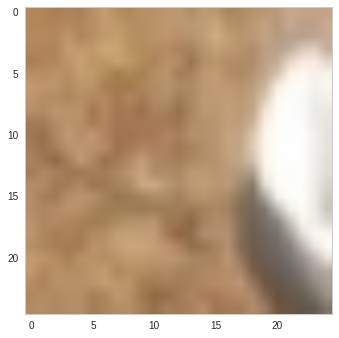

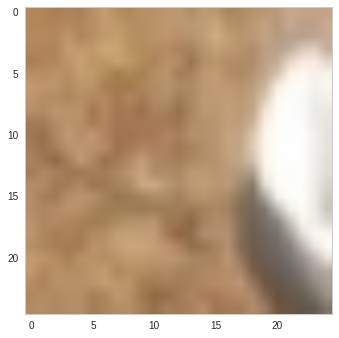

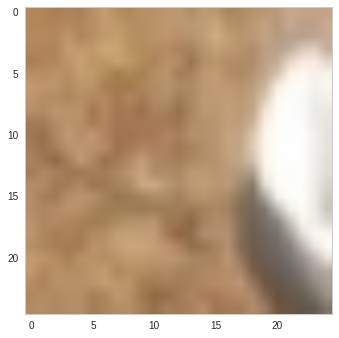

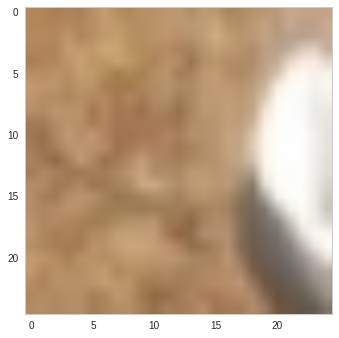

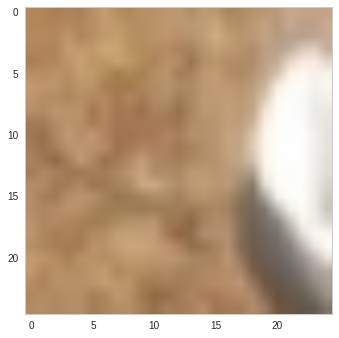

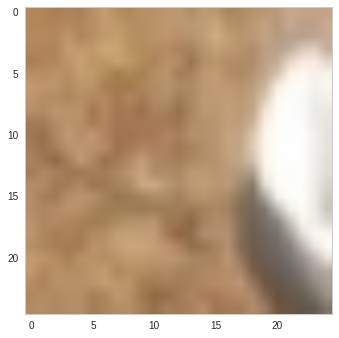

In [141]:
for k in np.where(resu==1)[0]:
    plt.imshow(a[s*int(i/12):s*int(i/12)+w,i%12:i%12+w])
    plt.show()

In [133]:
49%12

1

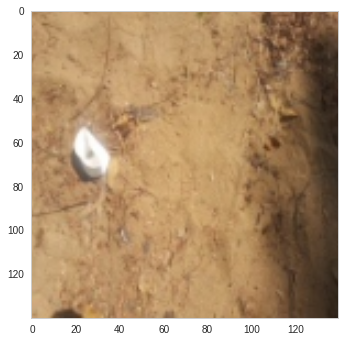

In [124]:
plt.imshow(a)
plt.show()

In [36]:
p=[]
for idx,m in enumerate(list(X)):
    p.append(cv2.resize(m,(25,25)))

np.array(p).shape
xn=np.array(p)

### pwd

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
epochs = 20
img_rows, img_cols = 25,25
y=y.reshape(-1,1)
#y=to_categorical(y)

x=(xn.reshape(xn.shape[0],img_rows,img_cols,3)/255).astype('float32')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#print('x_train shape:', x.shape)

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows,img_cols,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)

Train on 2383 samples, validate on 265 samples
Epoch 1/20
2383/2383 [==============================] - 1s - loss: 0.3977 - acc: 0.8065 - val_loss: 0.1371 - val_acc: 0.9396
Epoch 2/20
2383/2383 [==============================] - 1s - loss: 0.1572 - acc: 0.9274 - val_loss: 0.1498 - val_acc: 0.9396
Epoch 3/20
2383/2383 [==============================] - 1s - loss: 0.1478 - acc: 0.9316 - val_loss: 0.1043 - val_acc: 0.9472
Epoch 4/20
2383/2383 [==============================] - 1s - loss: 0.1157 - acc: 0.9496 - val_loss: 0.0870 - val_acc: 0.9698
Epoch 5/20
2383/2383 [==============================] - 1s - loss: 0.1078 - acc: 0.9538 - val_loss: 0.0757 - val_acc: 0.9736
Epoch 6/20
2383/2383 [==============================] - 1s - loss: 0.0828 - acc: 0.9677 - val_loss: 0.0729 - val_acc: 0.9774
Epoch 7/20
2383/2383 [==============================] - 1s - loss: 0.0910 - acc: 0.9660 - val_loss: 0.0787 - val_acc: 0.9660
Epoch 8/20
2383/2383 [==============================] - 1s - loss: 0.0649 - ac

In [60]:
cd ../cups/

/home/sritee/Desktop/beach/Important data/cups


In [174]:
import json
from pprint import pprint

with open('cups.json') as data_file:    
    data = json.load(data_file)


In [180]:
s=32
c=0
w=32
for q in range(len(data)):
    #print(q)
    #if q==1:
       #print('END')
       #break
    if len(data[q]['annotations'])==0:
            continue
    for r in range(len(data[q]['annotations'])):
        
        x=int(data[q]['annotations'][r]['x'])
        y=int(data[q]['annotations'][r]['y'])
        wi=int(data[q]['annotations'][r]['width'])
        hi=int(data[q]['annotations'][r]['height'])
        a=data[q]['filename']
        #print(a)
        c=c+1
        img=plt.imread('/home/sritee/'+a)
        img_r=img[y:y+hi,x:x+wi,:]
        img_r=cv2.resize(img_r,(32,32))
       
        #plt.imsave('/home/sritee/Desktop/beach/new_negatives/'+'negative'+str(c) +'.jpg',img_r)
        plt.imsave('/home/sritee/Desktop/beach/new_positives/'+'cup'+str(c) +'.jpg',img_r)

In [40]:
cup_aug=[]
for file in glob.glob('*.jpg'):
    a=plt.imread(file)
    if file[0]=='c':
        b=rotateImage(a,90)
        c=rotateImage(a,180)
        d=rotateImage(a,270)
        #c=(0.92*a).astype('int32')
        #d=np.clip(b+10,0,255).astype('int32')
        cup_aug.append(a)
        cup_aug.append(b)
        cup_aug.append(c)
        cup_aug.append(d)
    else:
        cup_aug.append(a)
        

In [48]:
pwd

'/home/sritee/Desktop/beach/Important data/test_folder'

In [41]:
n=np.array(cup_aug)
for idx,k in enumerate(cup_aug):
    plt.imsave('../check/'+str(idx)+'.jpg',k)

In [44]:
np.save('cups.npy',np.array(cup_aug))

In [47]:
model

In [52]:
cd ./beach/Important\ data

/home/sritee/Desktop/beach/Important data


In [51]:
model_json=

27885465_148138059327901_6149010162632884224_n.mp4
aaai_2018.pdf
Autonomous Overtaking/
beach/
bhajjiandashwin.mp4
chrome-giamkbecmklnciipbhfmcdhmigiobcij-Default.desktop*
courseraalgos/
cpp/
failure_overtake.png
GradApps/
GradApps.tar.gz
liverpool.jpg
MIT - Algorithms Course/
sridhar/
starting_pos.png
sucessful_overtake.png
Untitled Folder/


In [100]:
pwd

'/home/sritee/Desktop/beach/Important data/test_folder'

In [101]:
len(b)

1

In [137]:
b[0]=plt.imread('20180209_114014.resized.jpg')